## Introduction

The dataset provides a snapshot of a sample Netflix userbase, showcasing various aspects of user subscriptions, revenue, account details, and activity. Each row represents a unique user, identified by their User ID. The dataset includes information such as the user's subscription type (Basic, Standard, or Premium), the monthly revenue generated from their subscription, the date they joined Netflix (Join Date), the date of their last payment (Last Payment Date), and the country in which they are located.

Additional columns have been included to provide insights into user behavior and preferences. These columns include Device Type (e.g., Smart TV, Mobile, Desktop, Tablet), Total Watch Time (in minutes), and Account Status (whether the account is active or not).

#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

#### Reading Dataset

In [3]:
df = pd.read_csv("/Downloads/netflix-userbase-dataset/Netflix Userbase.csv")

In [4]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [5]:
df.shape

(2500, 10)

#### Check Missing Values

In [6]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

There are no missing values in dataset

#### Check Duplicates

In [7]:
if df.duplicated().any():
    print("Duplicates found!")
else:
    print("No duplicates found.")

No duplicates found.


#### Check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


#### Checking the number of unique values of each column

In [9]:
df.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

#### Statistics of data set

In [10]:
df.describe().T.style.background_gradient(cmap='turbo')

,count,mean,std,min,25%,50%,75%,max
User ID,2500.000000,1250.500000,721.832160,1.000000,625.750000,1250.500000,1875.250000,2500.000000
Monthly Revenue,2500.000000,12.508400,1.686851,10.000000,11.000000,12.000000,14.000000,15.000000
Age,2500.000000,38.795600,7.171778,26.000000,32.000000,39.000000,45.000000,51.000000


In [11]:
# convert object dtype into datetime dtype

df['Join Date'] = pd.to_datetime(df['Join Date'])  
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])  

In [12]:
# For exploring data we don't need User ID feature
df.drop(['User ID'],axis=1, inplace=True)

# Exploring Data

### Subscription Type

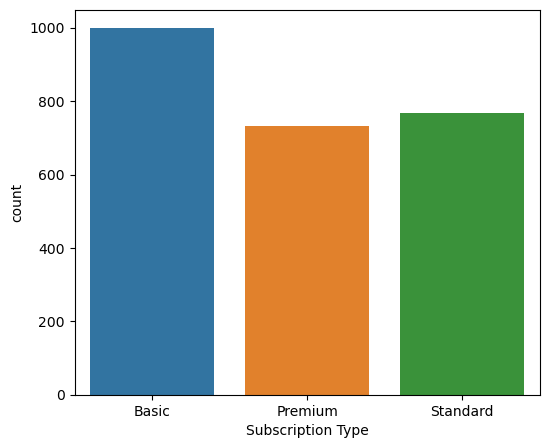

In [13]:
plt.figure(figsize=(6,5))
sns.countplot(data=df,x='Subscription Type')
plt.show()

* Basic subscription plan are most people using

#### Which subscription type generate the most revenue ?

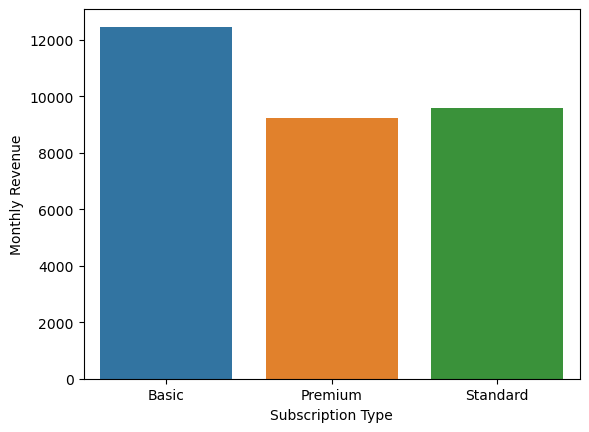

In [14]:
sm = df.groupby('Subscription Type').sum().reset_index()
sns.barplot(data=sm,x='Subscription Type', y='Monthly Revenue')
plt.show()

* Basic plan generates maximum revenue

### Country

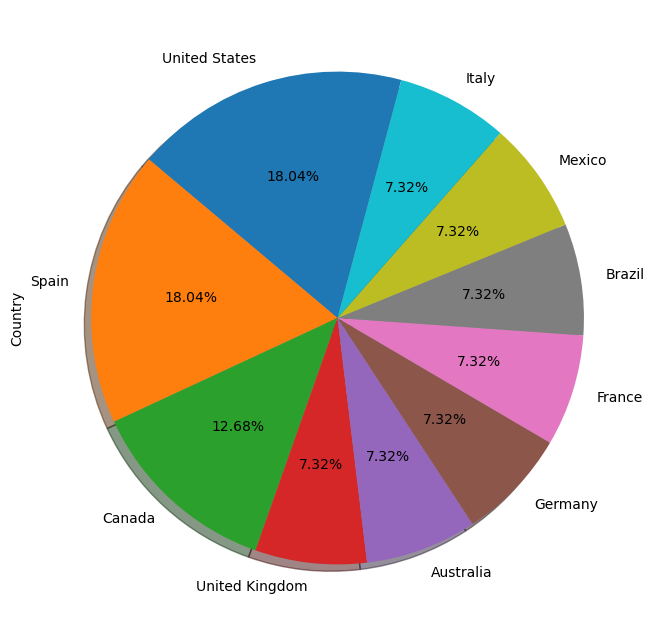

In [15]:
df.Country.value_counts().plot(kind='pie',shadow='True' ,autopct='%1.2f%%', startangle = 75,figsize=(8,8))
plt.show()

* Spain and United States have more customers

### Demographic

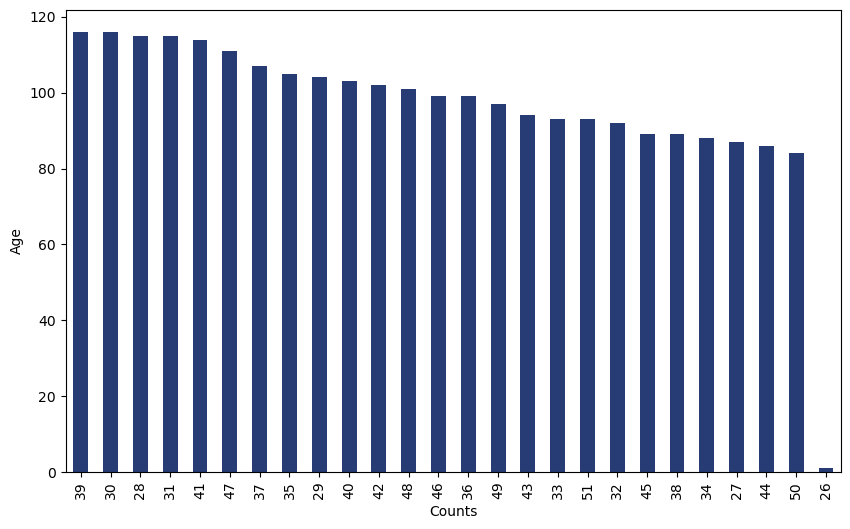

In [16]:
df.Age.value_counts().plot(kind='bar',color='#273c75',figsize=(10,6))
plt.ylabel("Age")
plt.xlabel("Counts")
plt.show()

* Maximum users are aged 39 followed by 30,28,31,41

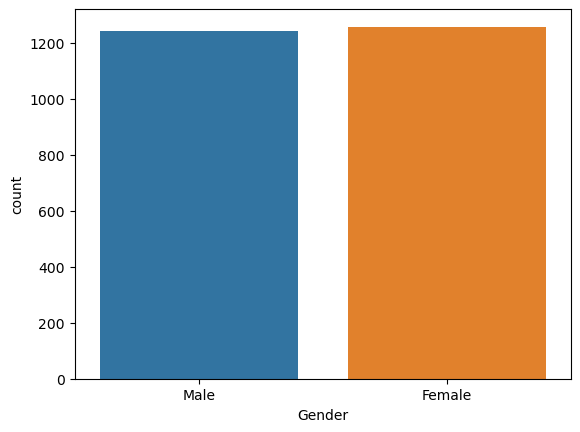

In [17]:
sns.countplot(data=df,x='Gender')
plt.show()

* Male & Female has equal counts

### Device

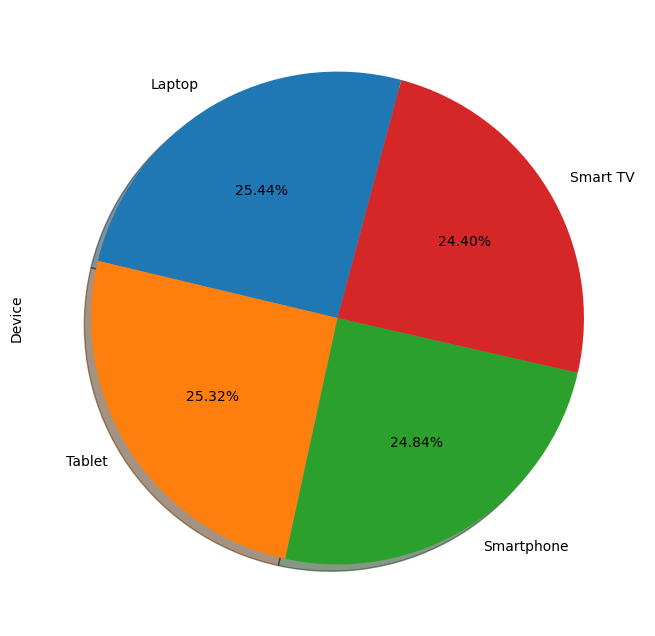

In [18]:
df.Device.value_counts().plot(kind='pie',shadow='True' ,autopct='%1.2f%%', startangle = 75,figsize=(8,8))
plt.show()

### Monthly Revenue

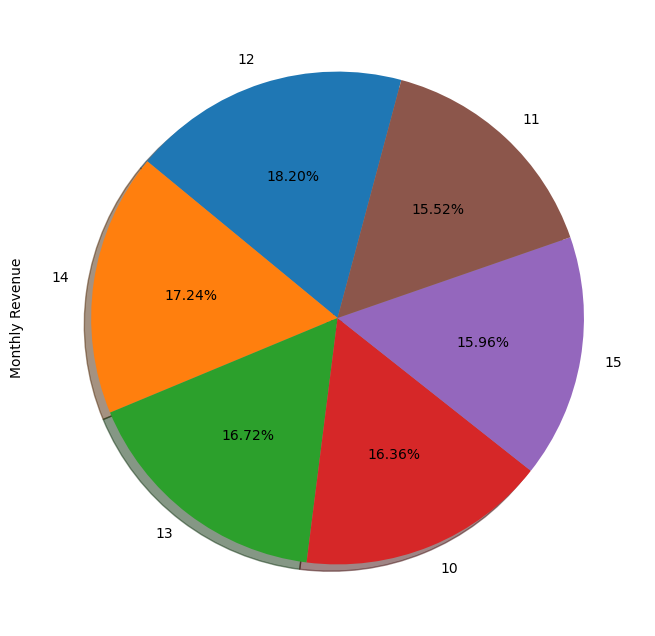

In [19]:
df['Monthly Revenue'].value_counts().plot(kind='pie',shadow='True' ,autopct='%1.2f%%', startangle = 75,figsize=(8,8))
plt.show()

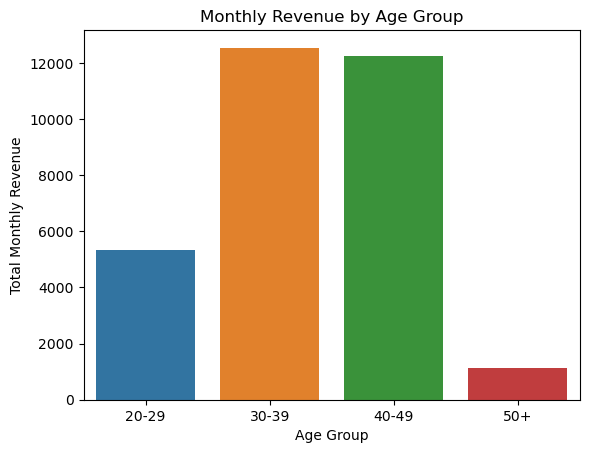

In [20]:
age_bins = [20, 30, 40, 50, 60]
age_labels = ['20-29', '30-39', '40-49', '50+']

df['age group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
revenue_by_age = df.groupby('age group')['Monthly Revenue'].sum().reset_index()
sns.barplot(data=revenue_by_age, x='age group',y='Monthly Revenue')
plt.xlabel('Age Group')
plt.ylabel('Total Monthly Revenue')
plt.title('Monthly Revenue by Age Group')
plt.show()

* Most of the users who are purchasing subscription has aged 30 to 49

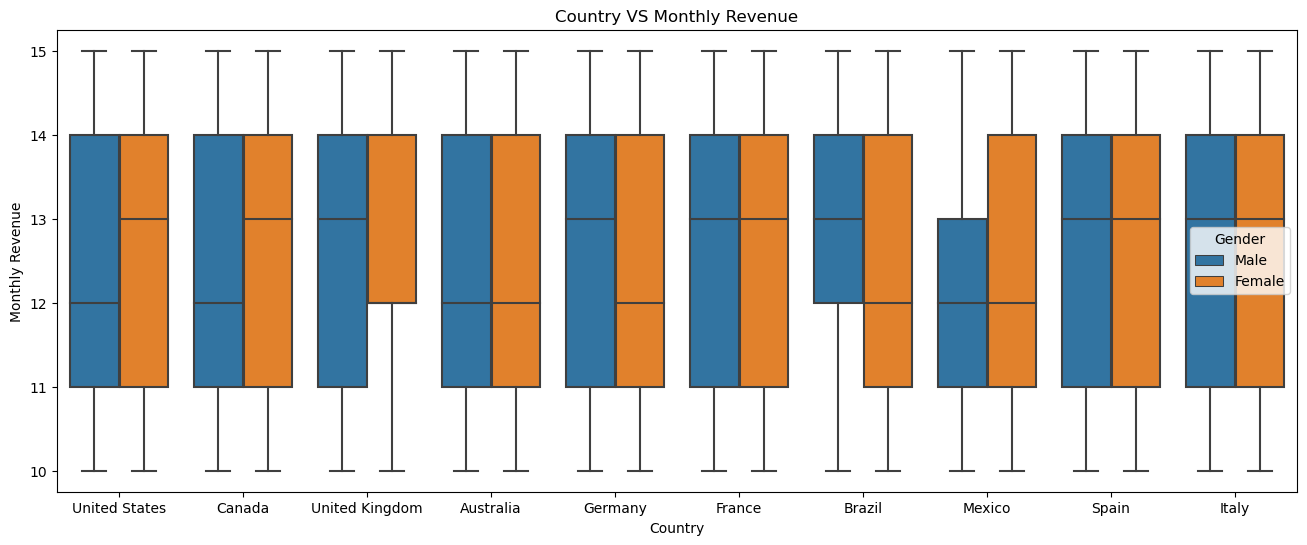

In [21]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df,x='Country', y='Monthly Revenue',hue='Gender',)
plt.title("Country VS Monthly Revenue")
plt.xlabel("Country")
plt.ylabel("Monthly Revenue")
plt.show()

### Customer Tenure

In [22]:
df['Tenure'] = (df['Last Payment Date'] - df['Join Date']).dt.days
df['Tenure (Months)'] = df['Tenure'] / 30

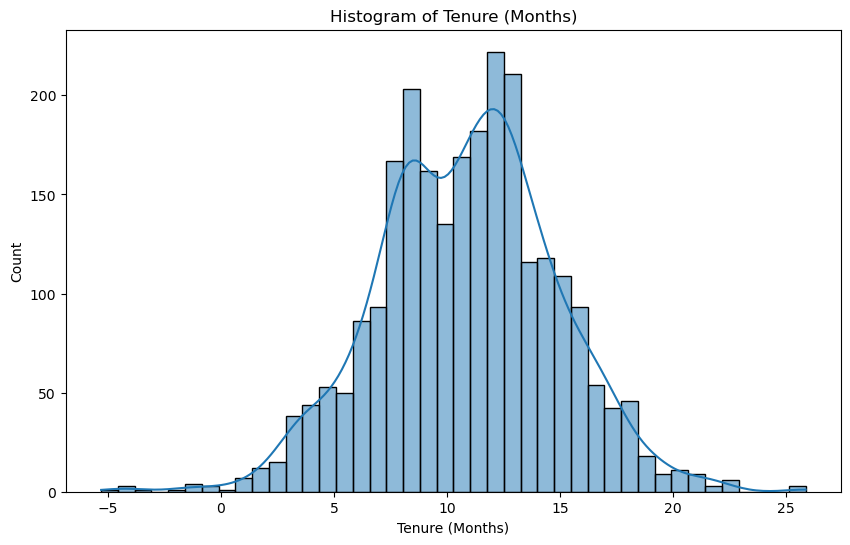

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Tenure (Months)', kde=True)
plt.title('Histogram of Tenure (Months)')
plt.show()

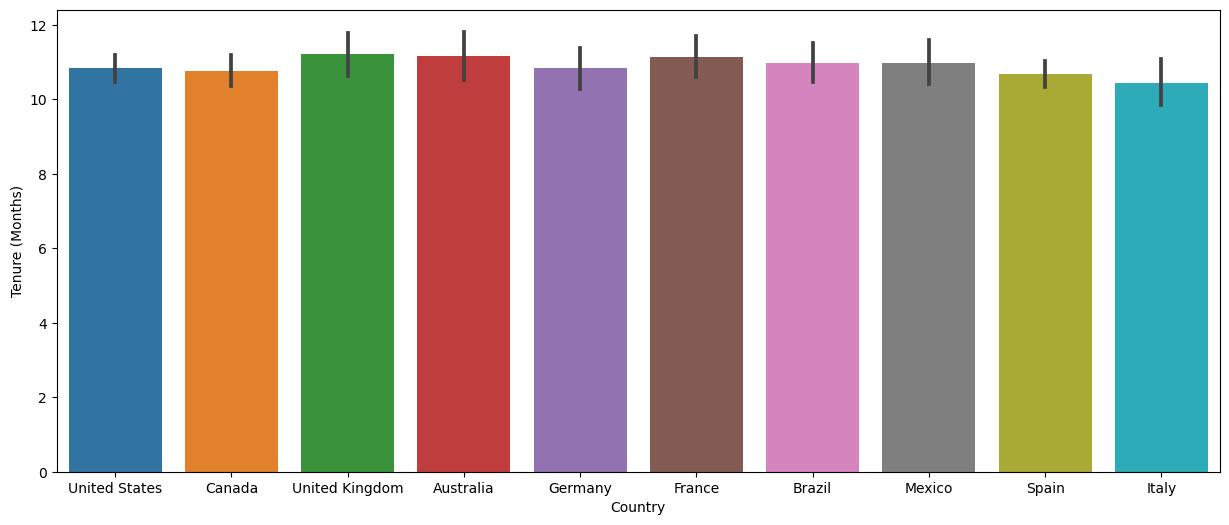

In [24]:
plt.figure(figsize=(15,6))
sns.barplot(data=df,x='Country',y='Tenure (Months)')
plt.show()

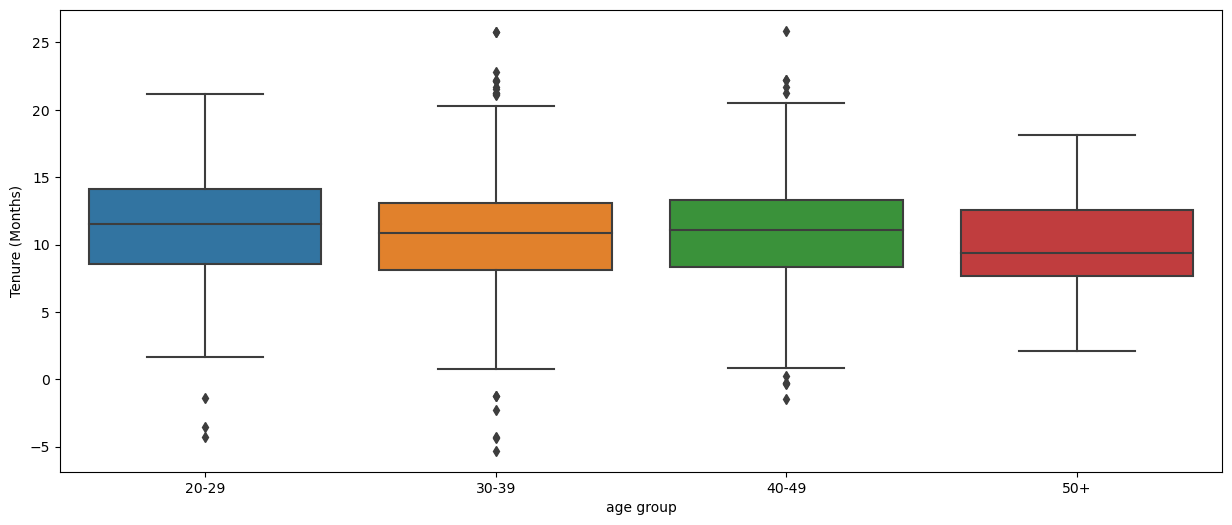

In [25]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df,x='age group',y='Tenure (Months)')
plt.show()

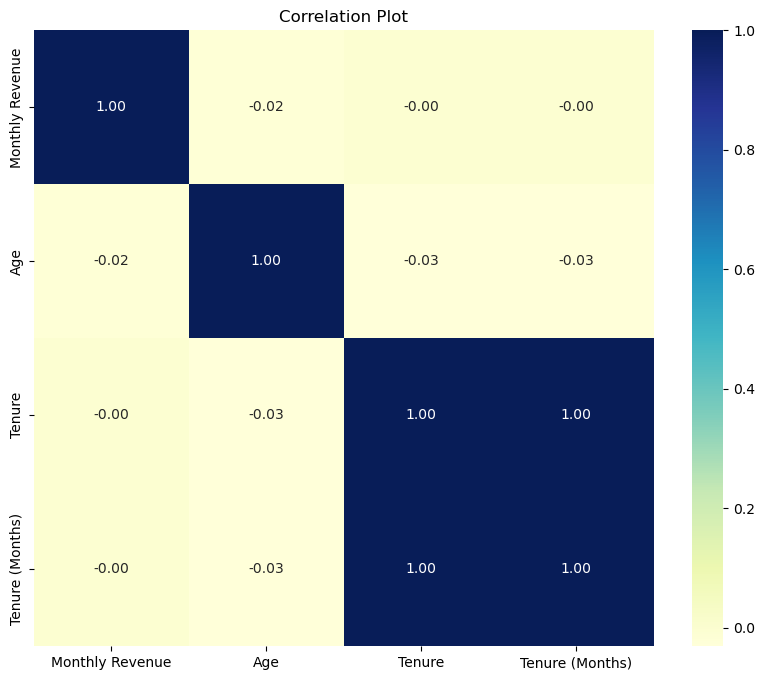

In [26]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Plot")
plt.show()

### Exploration end

## Final Insights :

* Age group 20-29 spend more time on Netflix
* All countries have similar rate of spending time
* Tenure (months) distribution is bimodal if it has two modes.
* Age group 30-49 doing the most subscription and giving more revenue
* Basic type subscription has maximum purchasing